Una vez definida nuestra estrategia de trabajo, comenzaremos con los datos y aplicaremos  los modelos considerados. Esta fase está dividida en diversas secuencias:

1. Limpieza del Dataset. En esta etapa, tras haber realizado la lectura del fichero de datos del Hospital de Wisconsin, realizaremos diferentes operaciones de limpieza y preprocesado de los datos para optimizar su calidad y poder así extraer el máximo de información con la mayor precisión posible. Prestaremos especial atención al datatype de los datos, los campos vacíos, etc. para aplicar las operaciones de transformación e imputación de valores que consideremos necesarias.

2. Estadística descriptiva del dataset. Calcularemos algunas estadísticas básicas de nuestro dataset para tener una visión superficial de cómo se distribuyen los datos, así como qué posibles atributos pueden tener mayor/menor correlación.


3. Algoritmos de clasificación. Tras la reducción de dimensionalidad, construiremos nuestros modelos con los algoritmos de clasificación: Decision Tree, KNN, Naive-Bayes y SVM. Dividiremos previamente el conjunto de datos al que le habremos aplicado previamente la reducción de la dimensionalidad en train set y test set. En cada uno de los modelos trataremos de de ajustar los parámetros adecuados que optimicen la precisión del modelo en cuestión mediante el oportuno hyperparameter tuning.

4. Evaluación. Finalmente, tras la aplicación de cada algoritmo, tendremos que cotrastar el resultado obtenido con el juego de datos original, para así verificar la precisión encontrada y la bondad ta
5. nto del modelo como de la propia reducción de la dimensionalidad.

En resumen:

Limpieza del dataset

Estadísitica descriptiva

Reducción de la dimensionalidad


- 3.1.1. Decision Tree
- 3.1.2. KNN
- 3.1.3. Naive-Bayes
- 3.1.4. SVM
- 3.2. t-SNE


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Pre-Modeling Tasks

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


# Evaluation and comparision of all the models


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

In [3]:
df= pd.read_csv("./data.csv")
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [4]:
df.shape

(569, 33)

###  Exploracion de datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Detalles estadistico basico

In [6]:
# describing the dataset

df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

### Comprobación de valores perdidos
El algoritmo de aprendizaje automático generalmente no puede funcionar con valores faltantes, por lo que antes de lanzar un algoritmo de aprendizaje automático debemos limpiar el conjunto de datos, eliminaremos las características que no afectan el modelo.

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# Deleting the id and Unnamed column

df= df.drop(['Unnamed: 32','id'],axis=1)

In [9]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

### Comprobando la correlación

C:\Users\crist\AppData\Local\Temp\ipykernel_11288\4121212878.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


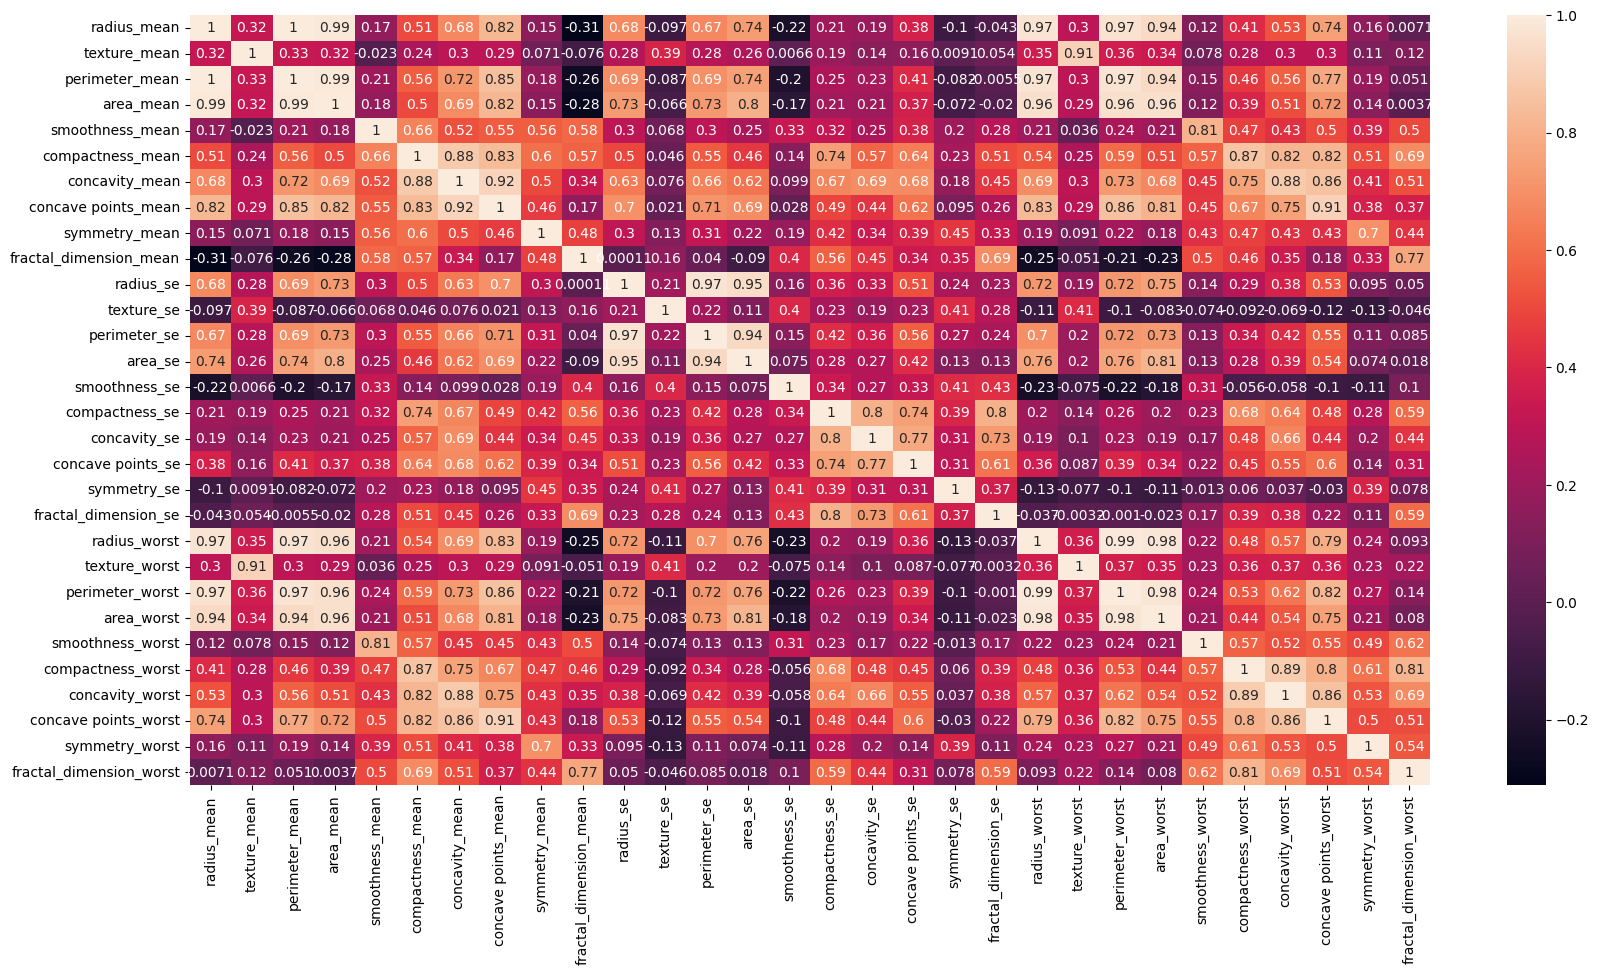

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.ioff()

### Pares altamente correlacionados

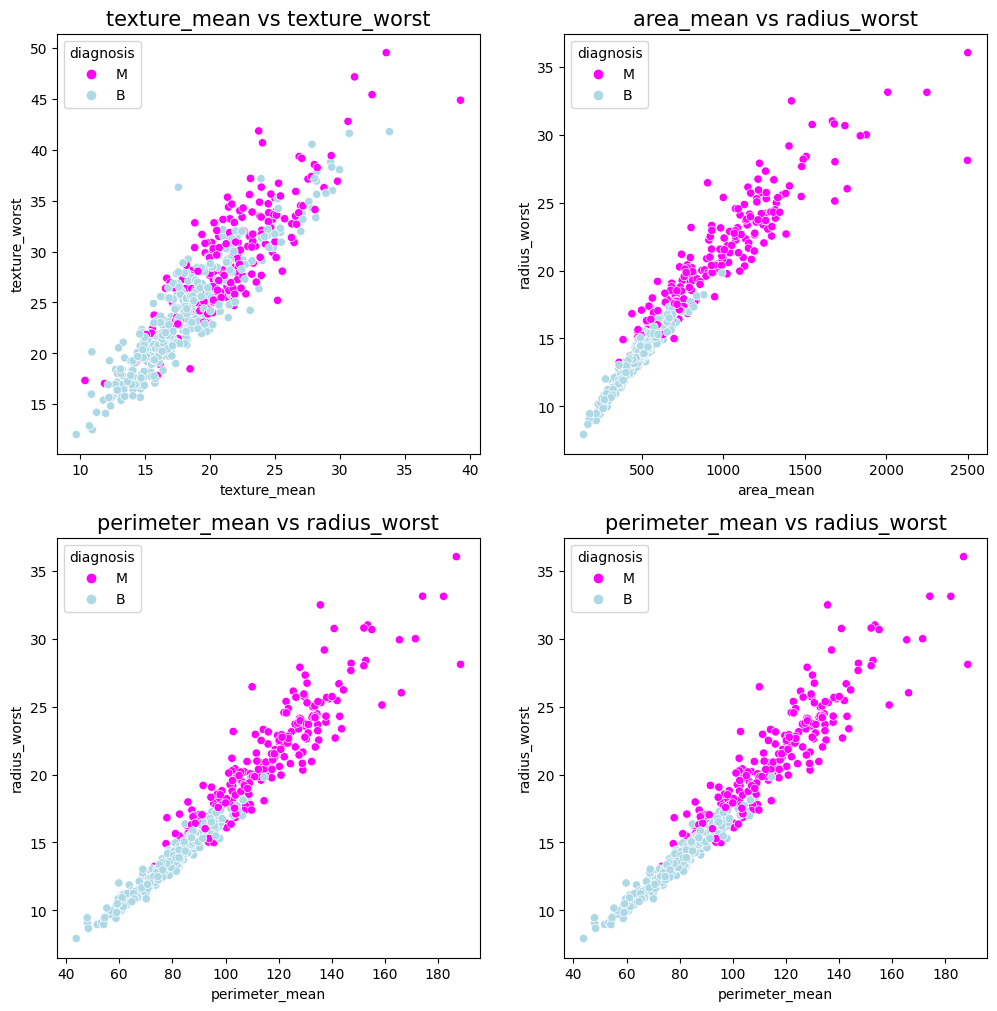

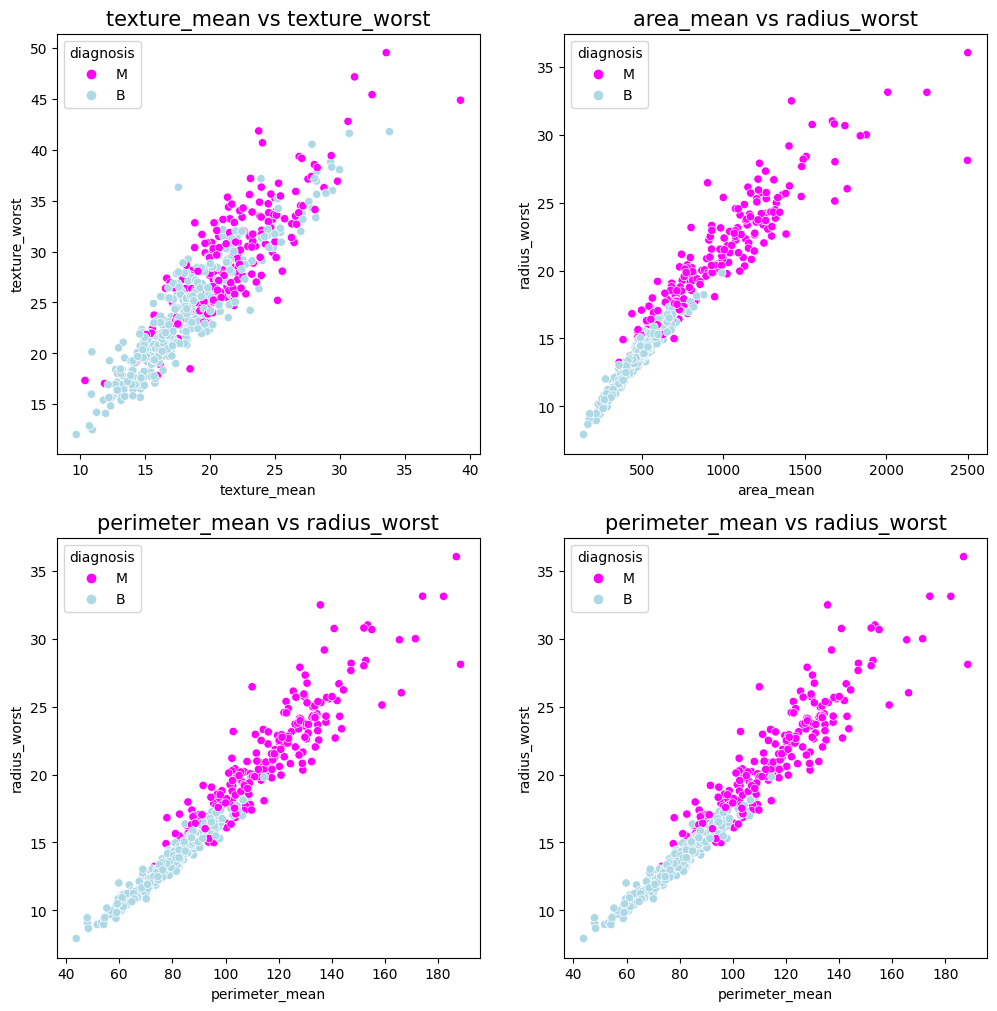

In [12]:
palette ={'B' : 'lightblue', 'M' : 'magenta'}


fig = plt.figure(figsize=(12,12))
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis",
                    data = df, palette = palette)
    plt.title(a + ' vs ' + b,fontsize=15)
    
plot_scatter('texture_mean','texture_worst',221) 
plot_scatter('area_mean','radius_worst',222) 
plot_scatter('perimeter_mean','radius_worst',223)  
plot_scatter('perimeter_mean','radius_worst',224) 
plt.show()

### Pares correlacionados bajos

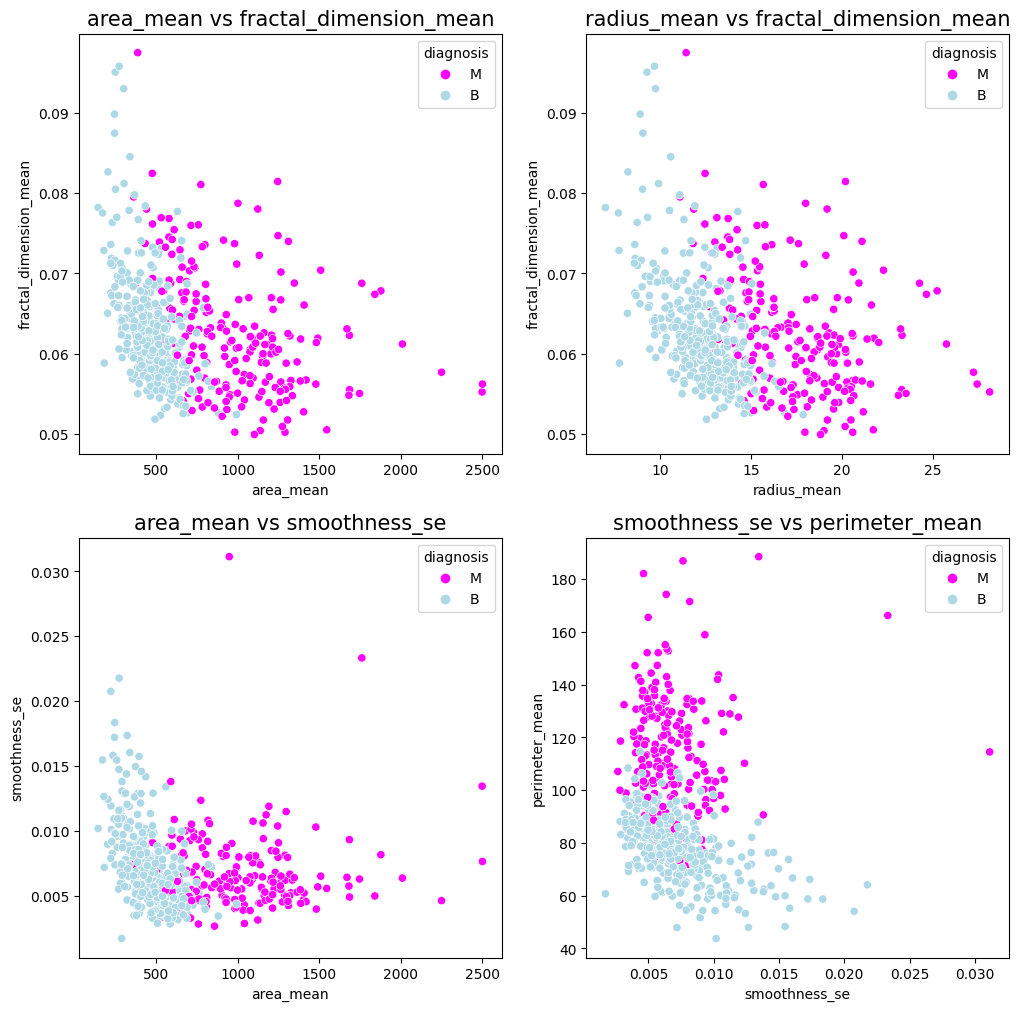

In [13]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)
plt.show()

### Data Visualization
PairPlot

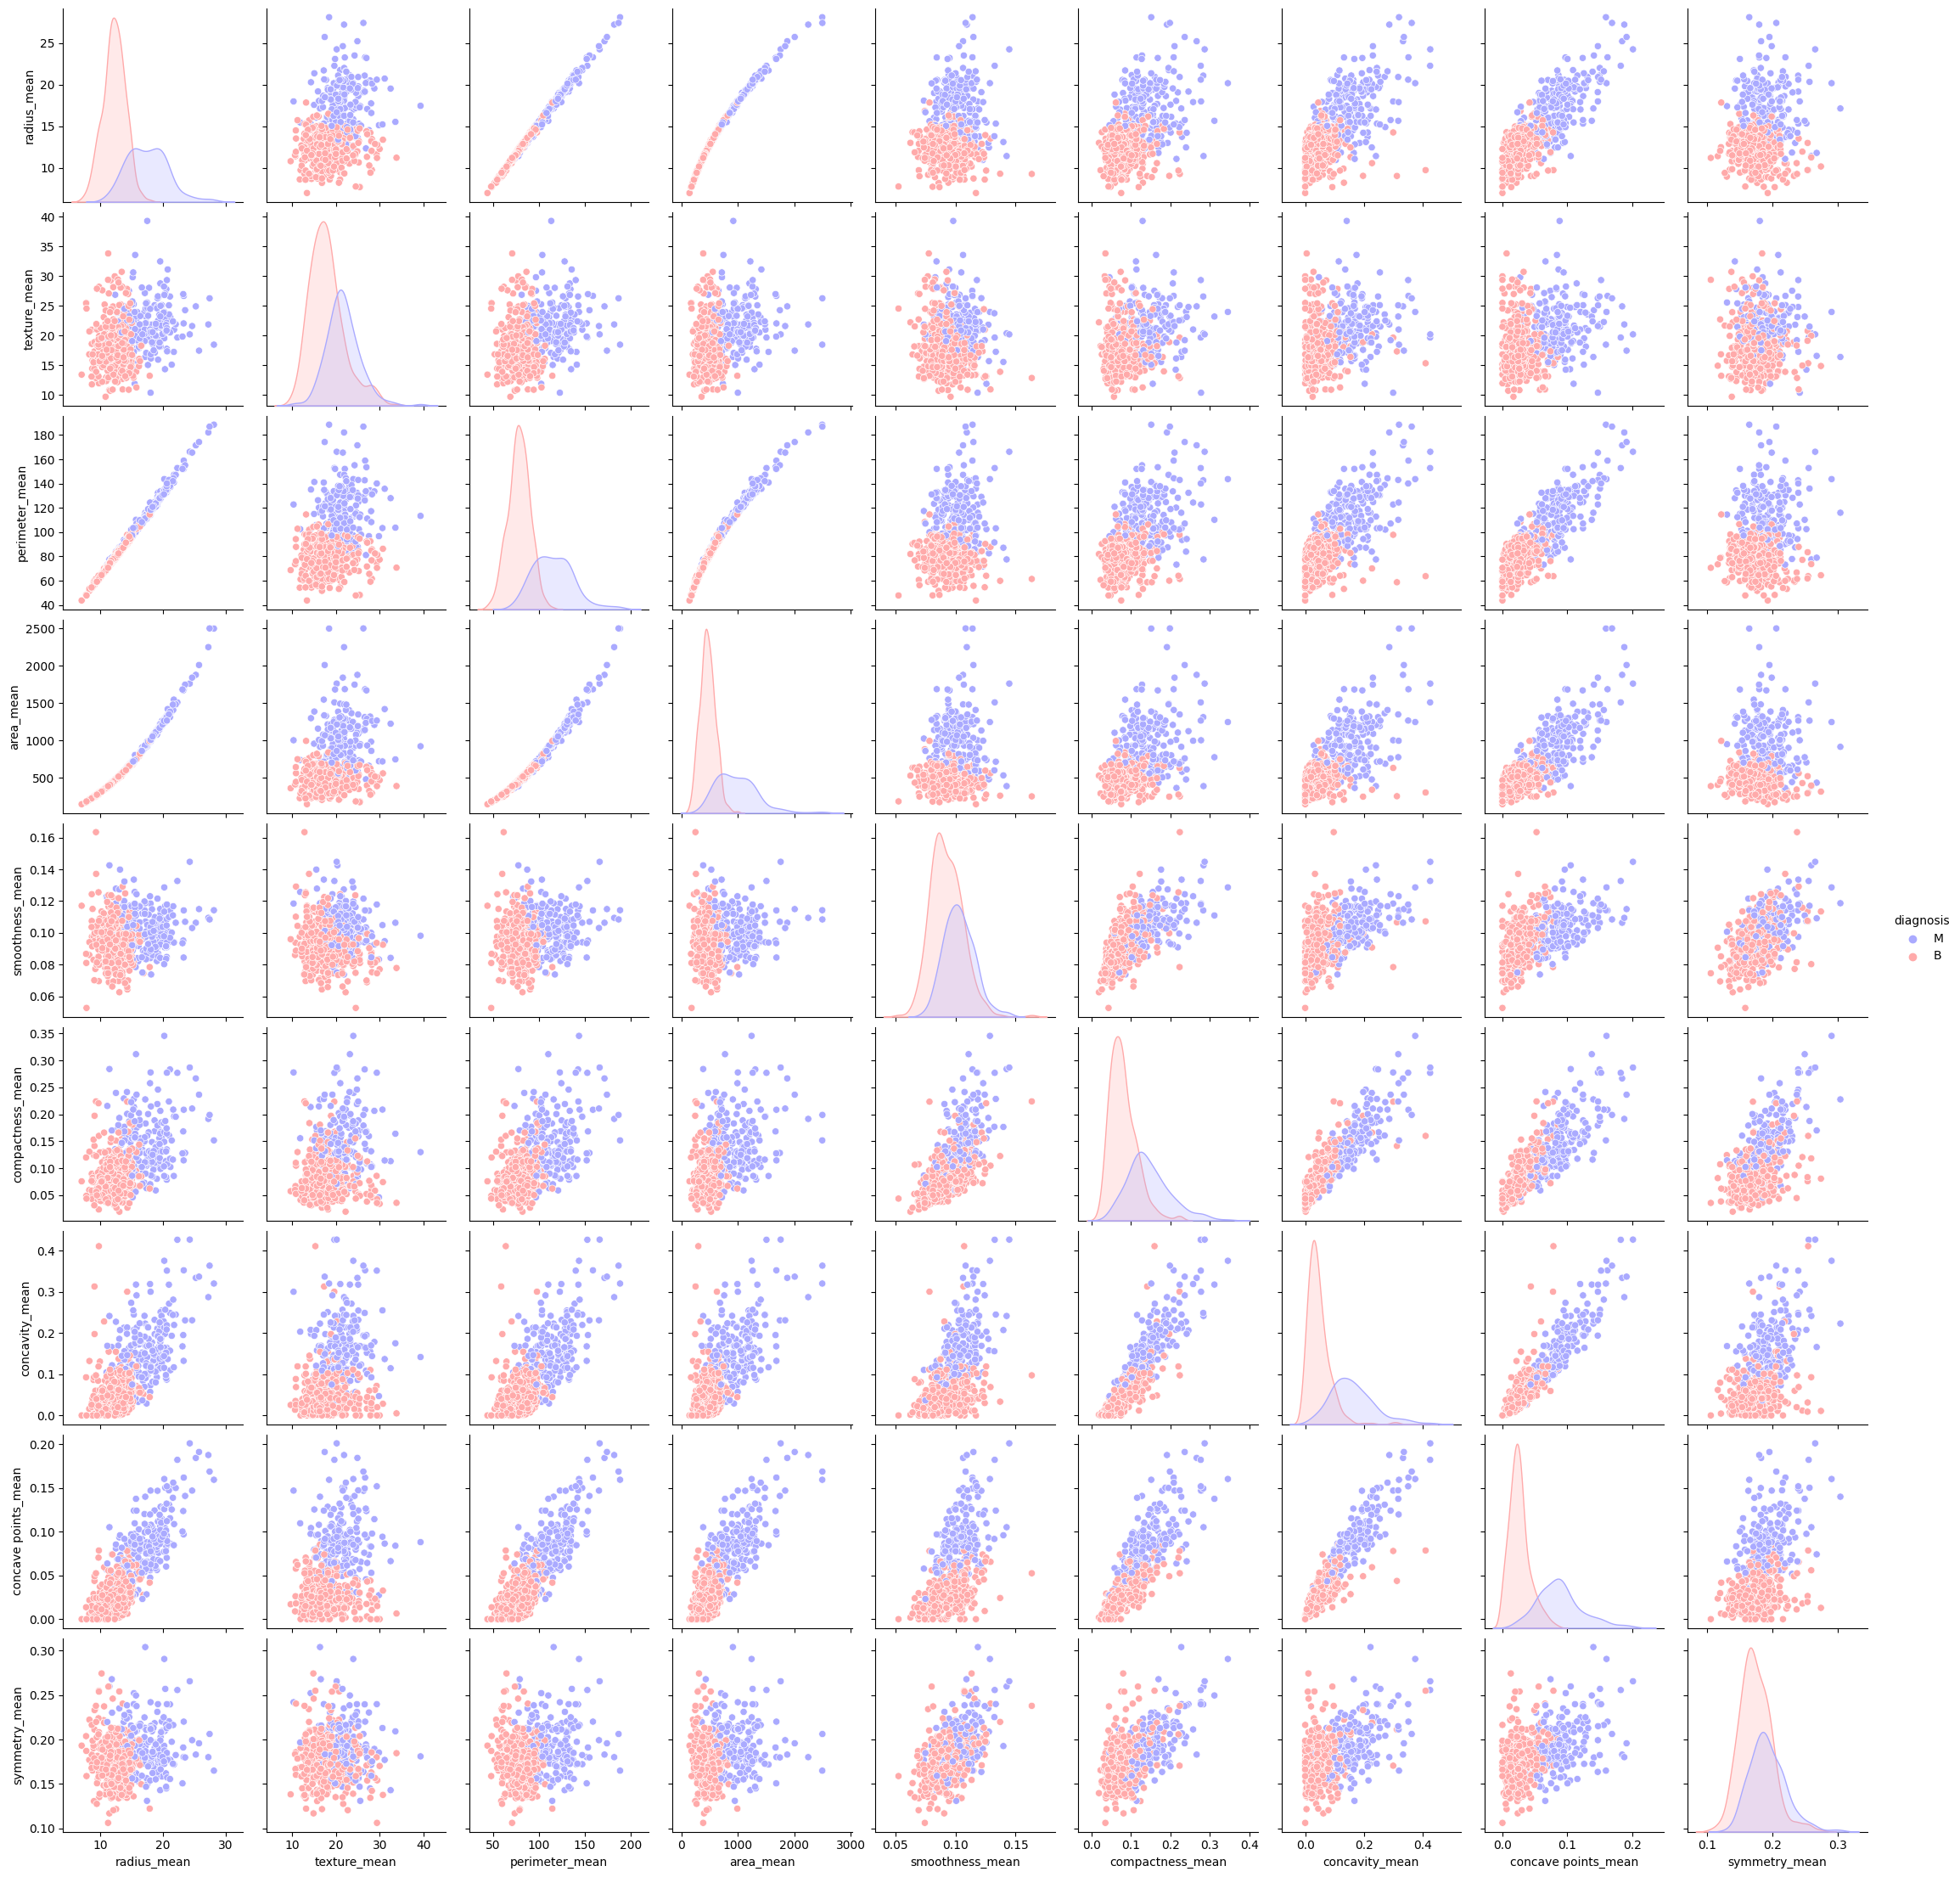

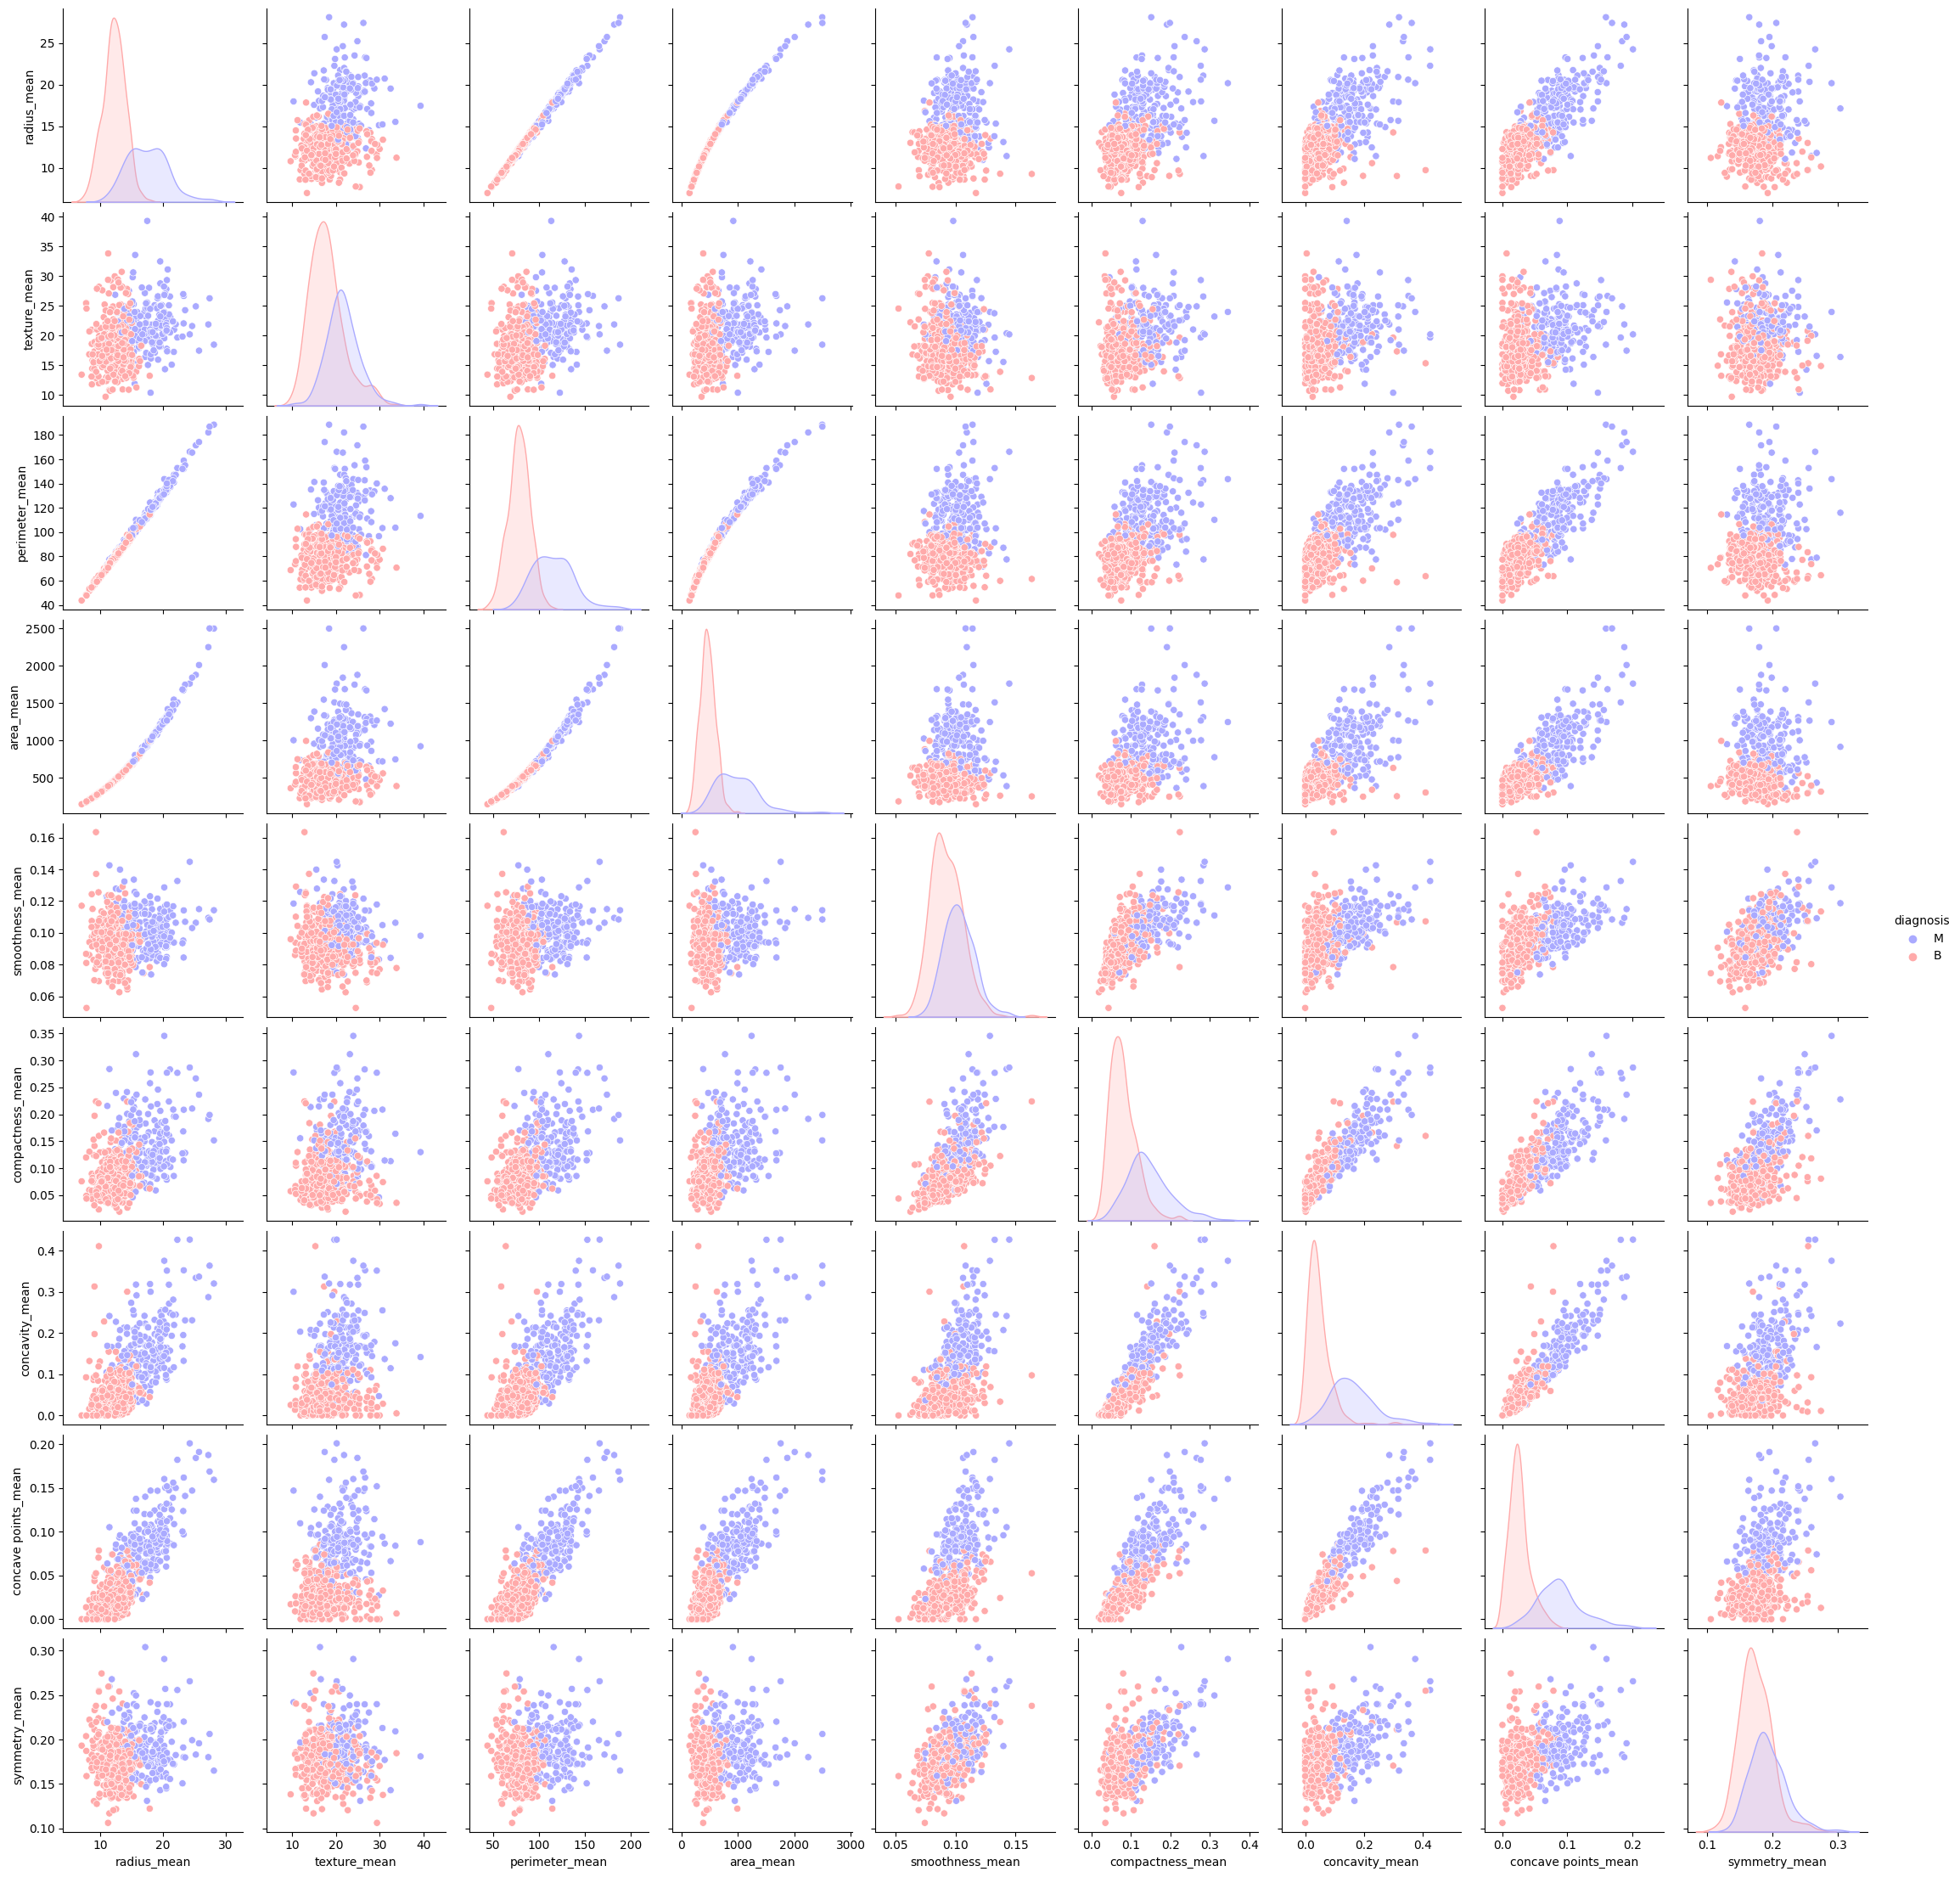

In [17]:
from pylab import rcParams

rcParams['figure.figsize'] = 8,5

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']

sns_plot = sns.pairplot(data=df[cols],hue='diagnosis', palette='bwr')
plt.show()


### ScatterPlot

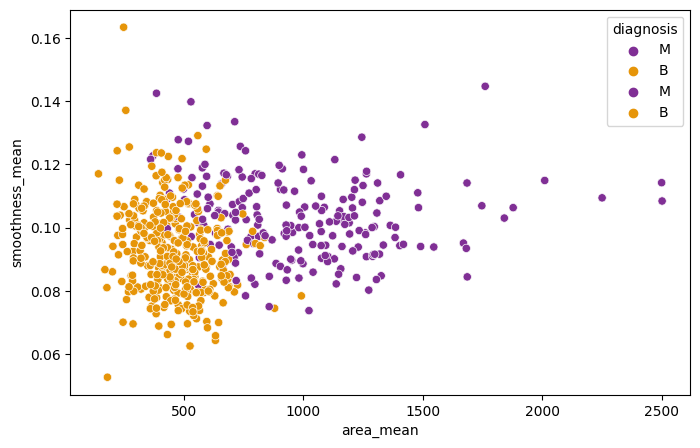

In [19]:
# area_mean vs smoothness_mean

sns.scatterplot(x= 'area_mean', y= 'smoothness_mean', hue= 'diagnosis', data=df, palette='CMRmap')
plt.show()

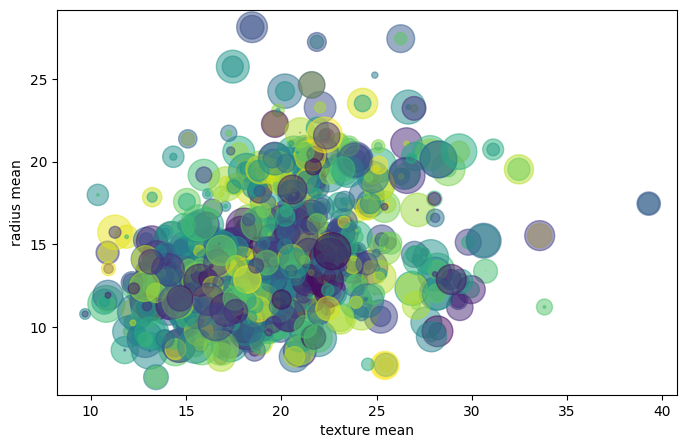

In [21]:
# texture mean vs radius_mean

size = len(df['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(df['texture_mean'], df['radius_mean'], s=area, c= colors, alpha=0.5)
plt.show()

### Count Plot

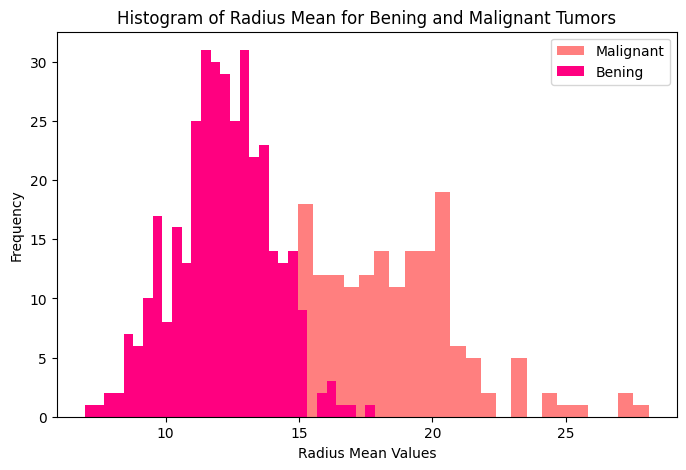

In [24]:
### Histogram

m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30, fc = (1,0,0.5), label= "Bening")

plt.legend()
plt.xlabel ("Radius Mean Values")
plt.ylabel ("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

### JointPlot

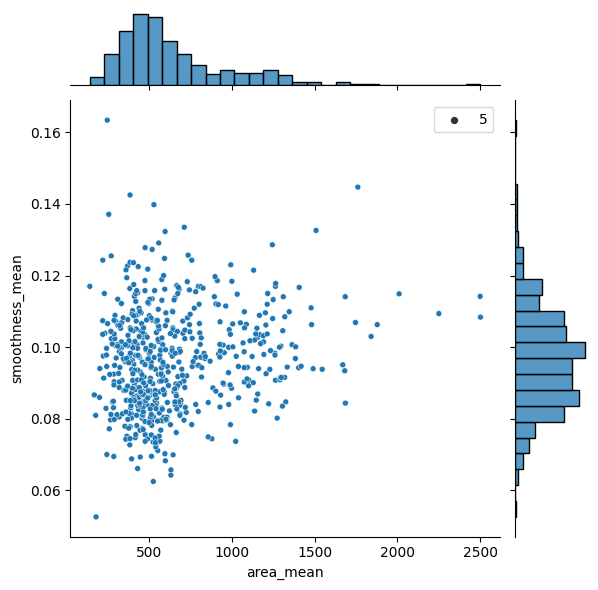

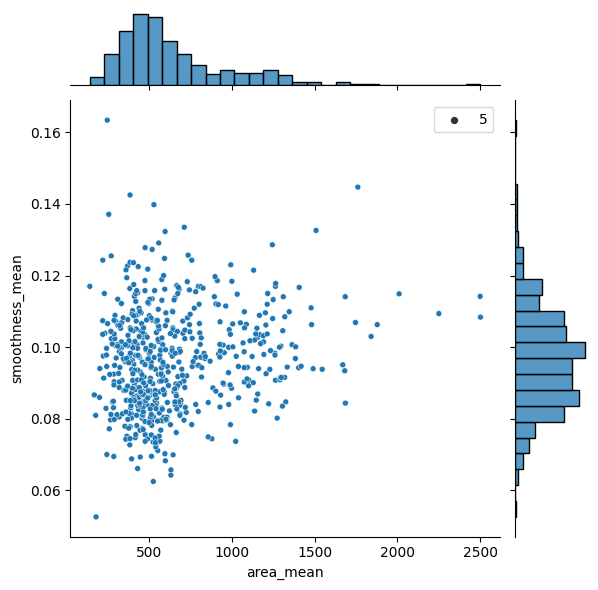

In [26]:
sns.jointplot(data= df, x='area_mean', y='smoothness_mean', size=5)
plt.show()

### Codificación de datos categóricos
Como sabemos, los algoritmos de aprendizaje automático solo pueden leer valores numéricos. Es esencial codificar características categóricas en valores numéricos.

In [27]:
# Label Encoder

LEncoder = LabelEncoder()

df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])

In [28]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

### Tareas previas al modelado
#### Separando la variable independiente y la dependiente

X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

### dividir el conjunto de datos
En Machine learning debemos dividir el conjunto de datos en datos de entrenamiento y prueba:

el conjunto de entrenamiento llamado también conjunto de aprendizaje que usaremos para entrenar nuestro modelo, tiene la mayor parte.

el conjunto de pruebas: se utiliza para evaluar el rendimiento del modelo después del ajuste del hipermarametro. También es útil para tener una idea de cómo se comportan los diferentes modelos (SVM, bosques aleatorios...) entre sí.

Entonces, crear el conjunto de prueba es fácil, solo seleccionamos algunas filas aleatorias, en general le damos 10% o 20%.

SKit_Learn proporciona una función para dividir el conjunto de datos en múltiples subconjuntos.

train_test_split(), es la forma más sencilla, igual que la función: split_train_test(), el método acepta listas, matrices numpy, matrices dispersas scipy o marcos de datos pandas.

También identificaremos algunos parámetros, como el estado aleatorio que le permite establecer la semilla del generador aleatorio.

Se dice que la división ideal es 80:20 para entrenamiento y prueba. Es posible que deba ajustarlo según el tamaño del conjunto de datos y la complejidad de los parámetros.

In [33]:
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_state)

### Escalado de características
El escalado de características es un método utilizado para estandarizar el rango de variables independientes o características de los datos. Escalar los datos es muy importante para aumentar la puntuación.

El escalado de características es un paso del preprocesamiento de datos que se aplica a variables independientes o características de los datos. Básicamente ayuda a normalizar los datos dentro de un rango particular.

Hay dos formas de escalar el conjunto de datos:

-Estandarización

-Escala Min_Max

Estandarización: resta el valor medio (por lo que los valores estandarizados siempre tienen una media cero), y luego lo divide por la desviación estándar, este método no tiene un rango específico de 0 a 1, eso puede causar un problema para muchos los algoritmos como Neural Network a menudo esperan un valor de entrada que va de 0 a 1.

Sckit-Learn proporciona un llamador de transformador StandardScaler. La idea detrás de StandardScaler es que transformará sus datos de modo que su distribución tenga un valor medio de 0 y una desviación estándar de 1.

Min_Max: también llamada Normalización, es la forma más sencilla de escalar datos, los valores se cambian y se vuelven a escalar para que terminen variando de 0 a 1. Hacemos esto restando el valor mínimo y dividiendo por el Max menos el Min.

Sckit-learn proporciona un transformador llamado MinMaxScaler. Tiene un hiperparámetro llamado "Rango de características" para especificar el rango que desea.

In [34]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

#### Modelado
En esta parte, probaremos diferentes modelos de aprendizaje automático: regresión logística, clasificador de aumento de gradiente, bosque aleatorio, clasificador XGB,

Máquina de vectores de soporte, árbol de decisión y modelo KNeighbors

In [35]:
# Logistic Regression


logreg= LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)


# Gradient Boosting Classifier


GB = GradientBoostingClassifier()

GB.fit(X_train, y_train)

y_pred_GB = GB.predict(X_test)



# Random Forest Classifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


# Decision Tree Classifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


# KNeighbors Classifier


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


# XGB Classifier

XGB = XGBClassifier() 

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)



# Support Vector classifier

svc = SVC(probability=True)

svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)

In [36]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

### Evaluación y comparación de todos los modelos

In [37]:
models = []

Z = [SVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,XGBClassifier(),
    RandomForestClassifier() , GradientBoostingClassifier()]


X = ["SVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier", "XGB"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_test))  

In [38]:
d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

Accuracy                   Algorithm
0  0.982456                         SVC
1  0.929825      DecisionTreeClassifier
2  0.973684          LogisticRegression
3  0.947368        KNeighborsClassifier
4  0.956140      RandomForestClassifier
5  0.964912  GradientBoostingClassifier
6  0.956140                         XGB

Como vemos, en la tabla y el gráfico anteriores, ese clasificador SVC funciona mejor para este conjunto de datos

Evaluación del rendimiento del modelo
La evaluación del modelo de aprendizaje automático es una parte crucial en cualquier proyecto de ciencia de datos. Hay muchas métricas que nos ayudan a evaluar la precisión de nuestro modelo.

Precisión de clasificación

matriz de confusión

Precisión

Recuerdo

informe_clasificación

Puntuación ROC AUC

Área bajo la curva (AUC)

Ahora, veamos las métricas de rendimiento del clasificador svc

Matriz de confusión
Una matriz de confusión es una tabla que se puede utilizar para medir el rendimiento de un algoritmo de aprendizaje automático, generalmente uno de aprendizaje supervisado. Cada fila de la matriz de confusión representa las instancias de una clase real y cada columna representa las instancias de una clase predicha
En un clasificador binario, la clase "verdadera" generalmente se etiqueta con 1 y la clase "falsa" se etiqueta con 0.

Verdadero positivo: una observación de clase positiva (1) se clasifica correctamente como positiva por el modelo.

Falso positivo: una clase de observación negativa (0) se clasifica incorrectamente como positiva.

Verdadero negativo: una observación de clase negativa se clasifica correctamente como negativa.

Falso negativo: una observación de clase positiva se clasifica incorrectamente como negativa.

Visualicemos la matriz de confusión, para ver qué tan precisos son los resultados que obtuvimos.

In [40]:
cm = np.array(confusion_matrix(y_test, y_pred_svc, labels=[1,0]))

confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])

confusion_mat

predicted_cancer  predicted_healthy
cancer                 41                  2
healthy                 0                 71

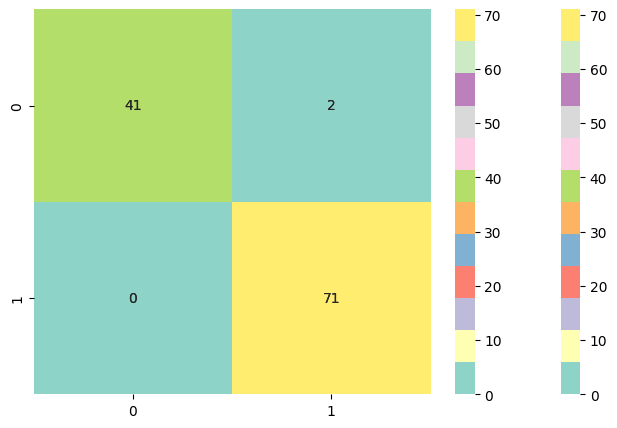

In [42]:
sns.heatmap(cm,annot=True,fmt='g',cmap='Set3')
plt.show()

Como podemos ver en la tabla anterior:

- Verdadero positivo (TP): valores que el modelo predijo como sí (saludable), y en realidad es sí (saludable).
- True Negative(TN): Valores que el modelo predijo como no(Cancer), y en realidad es no(Cancer).
- Falso Positivo (FP): Valores que el modelo predijo como sí (Saludable), pero en realidad no (Cáncer).
- Falso Negativo (FN): Valores que el modelo predijo como no (Cáncer), pero en realidad sí (Saludable).

Para este conjunto de datos, cada vez que el modelo predice algo como sí, indica Ausencia de células cancerosas (Saludable) y para los casos en que el modelo predice no; indica existencia de células cancerosas (Cáncer)

Precisión_puntuación
Accuracy_Score es la medida de rendimiento más intuitiva y es simplemente una relación entre la observación pronosticada correctamente y el total de observaciones.
(TP + TN)/total = 0,98245614

In [43]:
print(accuracy_score(y_test, y_pred_svc))

0.9824561403508771


### Precisión
La precisión es la relación entre las observaciones positivas pronosticadas correctamente y el total de observaciones positivas pronosticadas.

In [44]:
print(precision_score(y_test, y_pred_svc))

1.0


### Sensibilidad
La Sensibilidad, es la proporción de instancias positivas que el clasificador detecta correctamente con respecto a todas las observaciones en la clase real.

In [45]:
print(recall_score(y_test, y_pred_svc))

0.9534883720930233


### Informe de calificación


In [46]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



- True Positive(TP) : 71

- True Negative(TN) : 41

- False Positive(FP): 2

 False Negative(FN): 0

True Positive Rate/Recall/Sensitivity: How often the model predicts yes(Healthy) when it's actually yes(Healthy)?

- True Positive Rate(TPR) = TP/TP+FP = 71/(871+2) = 0.97
- False Positive Rate: How often the model predicts yes(Healthy) when it's actually no(Cancer)?

- False Positive Rate(FPR) = FP/FP+TN = 2/2+41 = 0.04

### The ROC Curve

0.99737962659679


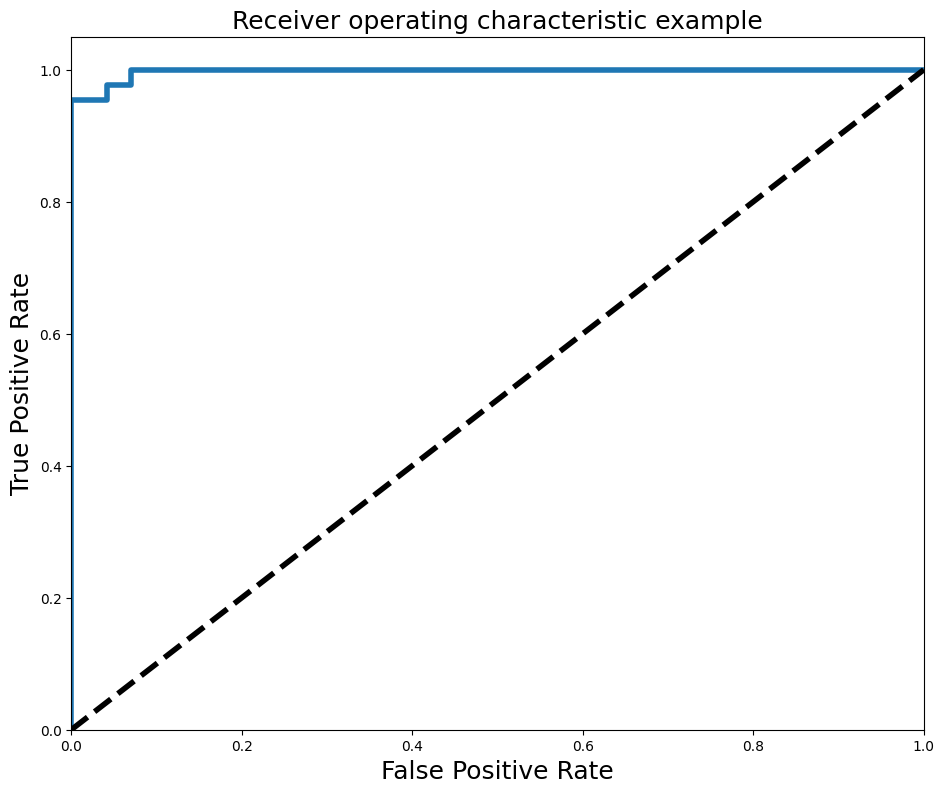

In [47]:
#plt.style.use('seaborn-pastel')

y_score = svc.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('Receiver operating characteristic example', fontsize= 18)
plt.show()

La curva ROC muestra el compromiso entre sensibilidad (o TPR) y especificidad (1 – FPR). Como notamos que el clasificador svc da una curva más cercana

a la esquina superior izquierda para que indique un mejor rendimiento.

Área bajo la curva
El área bajo la curva es una forma común de comparar clasificadores. Un clasificador perfecto tendrá ROC AUC igual a 1

Sckit-Learn proporciona una función para calcular el ROC AUC.

In [49]:
roc_auc_score(y_test, y_score)

0.99737962659679